## Linear Regression
___
by: _Oskar Edén Wallberg_

Implements two fundamental methods for linear regression <br>
Ordinary Least Squares (OLS) <br>
Gradient Descent (GD)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from models.LinRegOLS import LinearRegressionOLS
from models.LinRegGD import LinearRegressionGD

sns.set_style('darkgrid')
print(f'pd=={pd.__version__}')
print(f'np=={np.__version__}')
print(f'sns=={sns.__version__}')

pd==2.1.1
np==1.26.0
sns==0.13.0


### Create sample data
___
* linear data 

`y = 3x + 45`

In [18]:
m_samples = 100
X = np.linspace(0, m_samples-1, m_samples).reshape(-1,1)
noise = 50*np.random.randn(m_samples)
w = 3
b = 45
x = X.ravel()
y = w * x + b + noise

X.shape, y.shape

((100, 1), (100,))

### Scale data
___
* Important for GD to avoid exploding or vanishing gradient problems.

In [19]:
def standardize(a: np.ndarray) -> np.ndarray: 
    u, s = np.mean(a), np.std(a)
    return (a-u)/s

Xst = standardize(X)
yst = standardize(y)

Xst.shape, yst.shape

((100, 1), (100,))

### Visualize the dataset
___

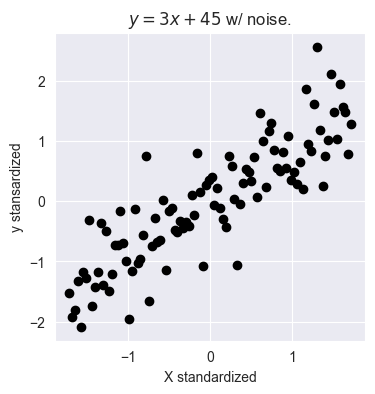

In [20]:
fig = plt.figure(figsize=(4,4))
ax: plt.Axes = plt.axes()
ax.scatter(Xst, yst, c='k')
ax.set_xlabel('X standardized')
ax.set_ylabel('y stansardized')
ax.set_title(rf'$y = {w}x + {b}$ w/ noise.')
plt.show()


### Ordinary least squares
___
Calc once:
* `X.T @ X @ B = X.T @ y`
* `B = np.inv(X.T @ X) @ (X.T @ y)`
* `b = B[0]` 
* `w = B[1:]`

In [21]:
linregOLS = LinearRegressionOLS()

linregOLS.fit(X=Xst, y=yst)

y_predOLS = linregOLS.predict(X=Xst)

y_predOLS.shape

(100,)

### Gradient descent
___
Iterate n times:
* `db = -2/N * np.sum(y-(X @ w + b))`
* `dw = -2/N * X.T @ (y-(X @ w + b))`
* `b = b - ɑ * db`
* `w = b - ɑ * dw`

In [22]:
linregGD = LinearRegressionGD()

linregGD.fit(X=Xst, y=yst)

y_predGD = linregGD.predict(X=Xst)

y_predGD.shape

(100,)

In [23]:
# accuracy measurement for regression
def mean_square_error(y_true, y_pred, decimals:int=3) -> int:
    mse = np.mean(np.square(y_true-y_pred))
    return np.round(mse, decimals=decimals)

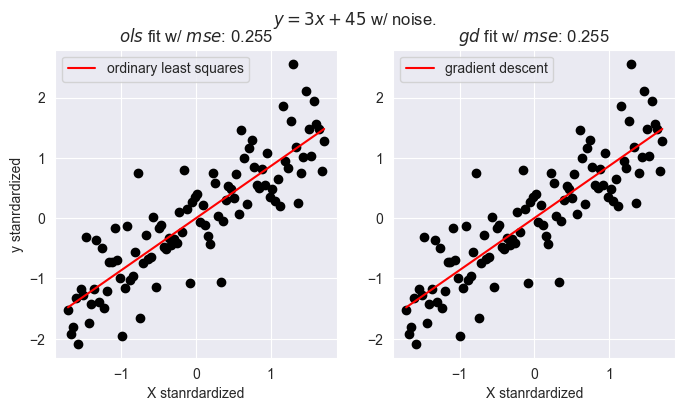

OLS - b: -0.0, w: [1.]
GD  - b: -0.0, w: [1.]


In [24]:
fig = plt.figure(figsize=(8,4))
fig.suptitle(rf'$y = {w}x + {b}$ w/ noise.')

ax1: plt.Axes = plt.axes(121)
ax1.scatter(Xst, yst, c='k')
ax1.plot(Xst, y_predOLS, c='r', label='ordinary least squares')
ax1.set_xlabel('X stanrdardized')
ax1.set_title(f'$ols$ fit w/ $mse$: {mean_square_error(y_true=yst, y_pred=y_predOLS)}')
ax1.legend()

ax2: plt.Axes = plt.axes(122)
ax2.scatter(Xst, yst, c='k')
ax2.plot(Xst, y_predGD, c='r', label='gradient descent')
ax2.set_xlabel('X stanrdardized')
ax2.set_title(f'$gd$ fit w/ $mse$: {mean_square_error(y_true=yst, y_pred=y_predGD)}')
ax2.legend()

ax1.set_ylabel('y stanrdardized')

plt.show()

print(f'OLS - b: {np.round(linregGD.b)}, w: {np.round(linregGD.w)}')
print(f'GD  - b: {np.round(linregOLS.b)}, w: {np.round(linregOLS.w)}')